# Basit Lineer Regresyon ve OLS

In [42]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
title_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
curve_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }

In [5]:
df=pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df.Street.unique()

array(['Pave', 'Grvl'], dtype=object)

In [9]:
df.MSSubClass.unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40], dtype=int64)

In [10]:
df.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [12]:
df.LotShape.unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [18]:
liste=['Street',"MSSubClass","MSZoning","LotShape"]

for i in liste:
    
    a=df[i].isnull().sum()*100/df.shape[0]
    print(i,a)

Street 0.0
MSSubClass 0.0
MSZoning 0.0
LotShape 0.0


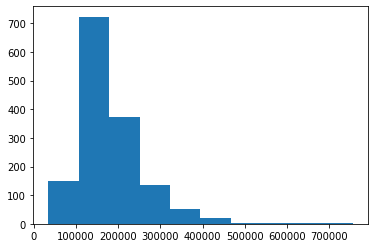

In [20]:
plt.hist(df['SalePrice'])
plt.show()

In [33]:
df['street'] = pd.get_dummies(df.Street,drop_first=True)
df['zoning'] = df.MSZoning.replace({'RL':0,"RM":1,"C (all)":2,"FV":3,"RH":4})
df['lotshape'] = df.LotShape.replace({'Reg':0, 'IR1':1, 'IR2':2, 'IR3':3}) 
df[['street','zoning','lotshape']]

,street,zoning,lotshape
0,1,0,0
1,1,0,0
2,1,0,1
3,1,0,1
4,1,0,1
...,...,...,...
1455,1,0,0
1456,1,0,0
1457,1,0,0
1458,1,0,0


In [34]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,street,zoning,lotshape
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,2008,WD,Normal,208500,1,0,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,5,2007,WD,Normal,181500,1,0,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,9,2008,WD,Normal,223500,1,0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,2,2006,WD,Abnorml,140000,1,0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,12,2008,WD,Normal,250000,1,0,1


Text(0.5, 0, 'MSZoning')

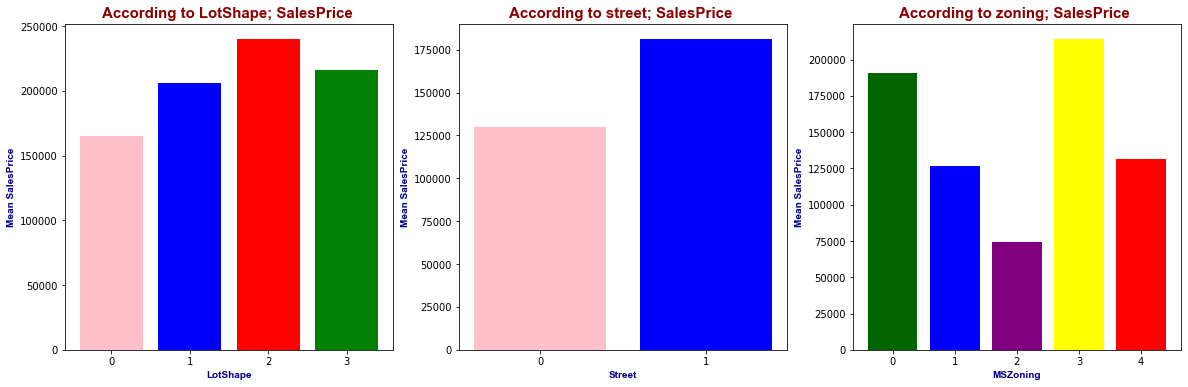

In [60]:
# burada lotshape- zoning - street in sales price üzerinde etkisi var mı onu irdeleyeceğiz
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.bar(df.groupby("lotshape")['SalePrice'].mean().index,
        df.groupby("lotshape")['SalePrice'].mean() , color=("pink","blue","red","green"))
plt.title("According to LotShape; SalesPrice ",fontdict=title_font)
plt.ylabel("Mean SalesPrice",fontdict=curve_font)
plt.xlabel("LotShape",fontdict=curve_font)
plt.xticks([0,1,2,3])


plt.subplot(1,3,2)
plt.bar(df.groupby("street")['SalePrice'].mean().index,
        df.groupby("street")['SalePrice'].mean() , color=("pink","blue"))
plt.title("According to street; SalesPrice ",fontdict=title_font)
plt.ylabel("Mean SalesPrice",fontdict=curve_font)
plt.xlabel("Street",fontdict=curve_font)
plt.xticks([0,1])

plt.subplot(1,3,3)
plt.bar(df.groupby("zoning")['SalePrice'].mean().index,
        df.groupby("zoning")['SalePrice'].mean() , color=("darkgreen","blue","purple","yellow","red"))
plt.title("According to zoning; SalesPrice ",fontdict=title_font)
plt.ylabel("Mean SalesPrice",fontdict=curve_font)
plt.xlabel("MSZoning",fontdict=curve_font)


In [61]:
Y= df['SalePrice']
X= df[['street','zoning','lotshape']]

In [63]:
from sklearn import linear_model

lrm = linear_model.LinearRegression()
lrm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Artık elimizde istediğimiz değerlerle çalıştırılmış ve bir sonuca ulaşılmış bir Lineer Regresyon formülü var.

SalesPrice = B0 + B0street + B2zoning + B3lotshape

In [65]:
print("Variables: \n",lrm.coef_)
print("Bias : \n",lrm.intercept_)

Variables: 
 [50643.75903142 -7106.33460017 34950.75944478]
Bias : 
 118637.0657777516


SalesPrice = 118637 + 50643*street + -7106*zoning + 34950*lotshape

In [66]:
import statsmodels.api as sm

X = sm.add_constant(X)
result= sm.OLS(Y,X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     41.38
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           1.17e-25
Time:                        04:11:54   Log-Likelihood:                -18484.
No. Observations:                1460   AIC:                         3.698e+04
Df Residuals:                    1456   BIC:                         3.700e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.186e+05   3.13e+04      3.790      0.000    5.72e+04     1.8e+05
street      5.064e+04   3.13e+04      1.620      0.105   -1.07e+04    1.12e+05
zoning     -7106.3346   2541.731     -2.796      0.005   -1.21e+04   -2120.489
lotshape    3.495e+04   3482.063     10.037      0.000    2.81e+04    4.18e+04
==============================================================================
Omnibus:                      620.762   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3591.093
Skew:                           1.907   Prob(JB):                         0.00
Kurtosis:                       9.670   Cond. No.                         33.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""